# Minimal Tutorial:

This example will generate a constraint function for a circle, where the interior is positive (feasible).

In [1]:
from lsdo_genie import Genie2D
import numpy as np

# Define a circle with outward pointing normal vectors
radius = 5.
num_pts = 40
theta = np.linspace(0,2*np.pi,num_pts,endpoint=False)
surface_points = radius*np.stack((np.cos(theta),np.sin(theta)),axis=1)
surface_normals = np.stack((np.cos(theta),np.sin(theta)),axis=1)

custom_domain = np.array([
    [-2*radius, 2*radius],
    [-2*radius, 2*radius],
])

genie = Genie2D()
genie.input_point_cloud(
    surface_points=surface_points,
    surface_normals=surface_normals,
)
genie.config(
    domain=custom_domain,
    max_control_points=30,
    min_ratio=0.75,
)
genie.solve_energy_minimization(
    Ln=1e0,
    Lr=1e-4,
)

phi = genie.compute_phi(surface_points)
print("Zero level set error: ",np.linalg.norm(phi))

Zero level set error:  0.0009607629759803086


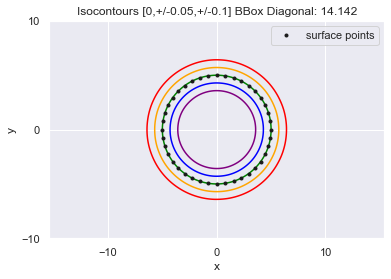

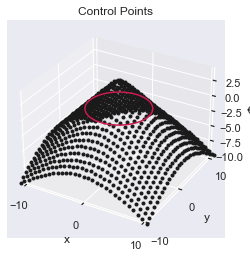

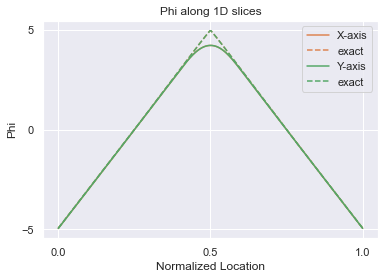

In [2]:
genie.visualize()